In [2]:
#Load the libraryss
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

In [3]:
#Importing the data
df_credit = pd.read_csv("loan.csv",index_col=0)

C:\Users\admin\AppData\Local\Temp\ipykernel_1392\814541364.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_credit = pd.read_csv("loan.csv",index_col=0)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Peeking at the data - 
df_credit.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
# Identify the percentage of missiing values in the dataset 
percent_missing = df_credit.isnull().sum() * 100 / len(df_credit)
missing_value_df_credit = pd.DataFrame({'column_name': df_credit.columns,
                                  'percent_missing': percent_missing})
missing_value_df_credit

,column_name,percent_missing
member_id,member_id,0.000000
loan_amnt,loan_amnt,0.000000
funded_amnt,funded_amnt,0.000000
funded_amnt_inv,funded_amnt_inv,0.000000
term,term,0.000000
...,...,...
tax_liens,tax_liens,0.098195
tot_hi_cred_lim,tot_hi_cred_lim,100.000000
total_bal_ex_mort,total_bal_ex_mort,100.000000
total_bc_limit,total_bc_limit,100.000000


In [10]:
# Delete columns having more number of Null values > 70%
perc = 70.0
min_count = int(((100-perc)/100*df_credit.shape[0] + 1))
df_credit_1 = df_credit.dropna(axis = 1, thresh = min_count)
#df_credit_1
#df_credit_1.shape
#(39717, 54)
df_credit.shape
(39717, 110)

(39717, 110)

In [12]:
# drop all rows that have missing values in more than 10 columns
df_credit_2 = df_credit_1.dropna(thresh=len(df_credit_1.columns)-1)
df_credit_2.shape
#(29632, 54)

(29632, 54)

In [13]:
df_credit_2.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [25]:
# Drop all rows whose loan status is current
df_credit_3 = df_credit_2[df_credit_2['loan_status'] != 'Current']
df_credit_3.shape
#(28815, 54)

(28815, 54)

In [26]:
# Describe the statistical variables in the dataframe
df_credit_3.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,2.881500e+04,28815.000000,28815.000000,28815.000000,28815.000000,2.881500e+04,28815.000000,28815.000000,28815.000000,13115.000000,...,28815.000000,28815.000000,28815.000000,28815.0,28815.0,28815.0,28815.0,28815.0,28206.000000,28815.0
mean,8.141448e+05,11192.510845,10914.530626,10245.684271,327.944276,6.947963e+04,13.283489,0.188895,0.881798,36.031186,...,99.355932,13.110095,2772.237691,0.0,1.0,0.0,0.0,0.0,0.042331,0.0
std,2.700870e+05,7248.209486,6985.696902,6936.284953,206.685922,6.748392e+04,6.616997,0.552600,1.074568,21.931330,...,705.708907,148.094740,4472.830300,0.0,0.0,0.0,0.0,0.0,0.202051,0.0
min,7.472400e+04,500.000000,500.000000,0.000000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,6.211605e+05,5600.000000,5600.000000,5000.000000,170.960000,4.200000e+04,8.210000,0.000000,0.000000,18.000000,...,0.000000,0.000000,225.085000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,8.092020e+05,10000.000000,9800.000000,8900.000000,285.780000,6.000000e+04,13.420000,0.000000,1.000000,34.000000,...,0.000000,0.000000,592.100000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,1.016938e+06,15000.000000,15000.000000,14000.000000,434.140000,8.300000e+04,18.500000,0.000000,1.000000,52.000000,...,0.000000,0.000000,3530.525000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,...,29623.350000,6543.040000,35613.680000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [27]:
# Check the info of the dataframe to get details of each column
df_credit_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28815 entries, 1077430 to 120215
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   28815 non-null  int64  
 1   loan_amnt                   28815 non-null  int64  
 2   funded_amnt                 28815 non-null  int64  
 3   funded_amnt_inv             28815 non-null  float64
 4   term                        28815 non-null  object 
 5   int_rate                    28815 non-null  object 
 6   installment                 28815 non-null  float64
 7   grade                       28815 non-null  object 
 8   sub_grade                   28815 non-null  object 
 9   emp_title                   28494 non-null  object 
 10  emp_length                  28805 non-null  object 
 11  home_ownership              28815 non-null  object 
 12  annual_inc                  28815 non-null  float64
 13  verification_status     

In [28]:
# copy the cleansed dataframe into a new data frame
df = df_credit_3
df.shape
#(28815, 54)

(28815, 54)

<AxesSubplot:xlabel='loan_status'>

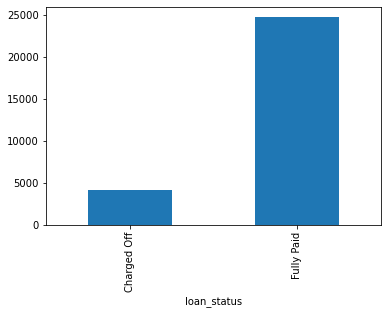

In [30]:
# get the count of charged off and fully paid loan status
df.groupby(['loan_status']).size().plot(kind='bar')

### Start of Univarite Analysis

<AxesSubplot:xlabel='purpose'>

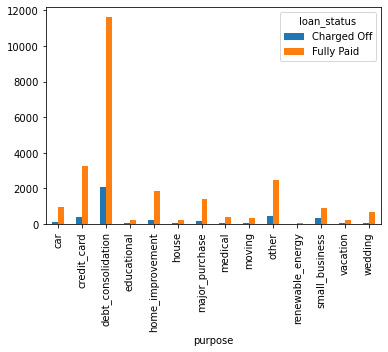

In [32]:
df.groupby('purpose')['loan_status'].value_counts().unstack().plot(kind='bar')

    * Based on the analysis debt_consolidation purpose of loan has higher impact on charged off loan
    * We can have some checkpoints before approving loan for debt_consolidation purpose

In [40]:
# create dervied columns for univariate analysis
df['loan_approved_delta'] = df['loan_amnt'] - df['funded_amnt']
df[df['loan_approved_delta'] > 0].shape


C:\Users\admin\AppData\Local\Temp\ipykernel_1392\3140071545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_approved_delta'] = df['loan_amnt'] - df['funded_amnt']


(1393, 55)

In [46]:
# create dervied columns for univariate analysis
df['loan_sanctioned_delta'] = df['loan_amnt'] - df['funded_amnt']
df[df['loan_sanctioned_delta'] > 0].shape

C:\Users\admin\AppData\Local\Temp\ipykernel_1392\3173494110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_sanctioned_delta'] = df['loan_amnt'] - df['funded_amnt']


(1393, 56)

In [47]:
df.shape

(28815, 56)

In [49]:
# Create binning by funded amount
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_approved_delta,loan_sanctioned_delta
count,2.881500e+04,28815.000000,28815.000000,28815.000000,28815.000000,2.881500e+04,28815.000000,28815.000000,28815.000000,13115.000000,...,28815.000000,28815.0,28815.0,28815.0,28815.0,28815.0,28206.000000,28815.0,28815.000000,28815.000000
mean,8.141448e+05,11192.510845,10914.530626,10245.684271,327.944276,6.947963e+04,13.283489,0.188895,0.881798,36.031186,...,2772.237691,0.0,1.0,0.0,0.0,0.0,0.042331,0.0,277.980219,277.980219
std,2.700870e+05,7248.209486,6985.696902,6936.284953,206.685922,6.748392e+04,6.616997,0.552600,1.074568,21.931330,...,4472.830300,0.0,0.0,0.0,0.0,0.0,0.202051,0.0,1450.334760,1450.334760
min,7.472400e+04,500.000000,500.000000,0.000000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
25%,6.211605e+05,5600.000000,5600.000000,5000.000000,170.960000,4.200000e+04,8.210000,0.000000,0.000000,18.000000,...,225.085000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
50%,8.092020e+05,10000.000000,9800.000000,8900.000000,285.780000,6.000000e+04,13.420000,0.000000,1.000000,34.000000,...,592.100000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
75%,1.016938e+06,15000.000000,15000.000000,14000.000000,434.140000,8.300000e+04,18.500000,0.000000,1.000000,52.000000,...,3530.525000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,...,35613.680000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0,21025.000000,21025.000000


In [56]:
# Correlation
df_filter = df[['funded_amnt_inv', 'loan_status', 'annual_inc', 'loan_approved_delta', 'loan_sanctioned_delta']]
df_filter.corr()


,funded_amnt_inv,annual_inc,loan_approved_delta,loan_sanctioned_delta
funded_amnt_inv,1.000000,0.225365,0.072382,0.072382
annual_inc,0.225365,1.000000,0.069534,0.069534
loan_approved_delta,0.072382,0.069534,1.000000,1.000000
loan_sanctioned_delta,0.072382,0.069534,1.000000,1.000000
